# LOADING THE DATA SET

In [1]:
import pandas as pd
df=pd.read_excel(r'C:\Users\shine\Downloads\iris.xls')

In [2]:
df

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
df.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# CHECKING FOR NULL VALUES

In [5]:
df.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [6]:
df.shape

(150, 5)

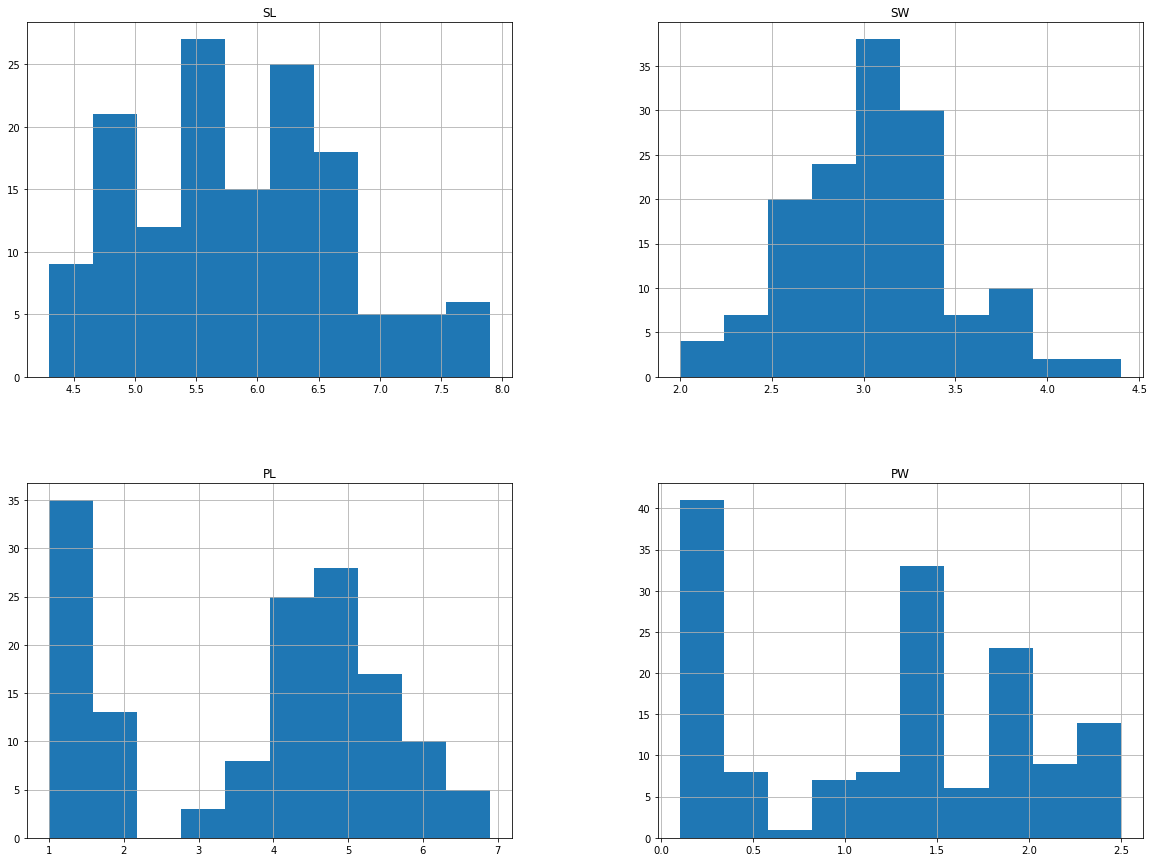

In [7]:
import matplotlib.pyplot as plt
freqgraph=df.select_dtypes(include=['float'])
freqgraph.hist(figsize=(20,15))
plt.show()

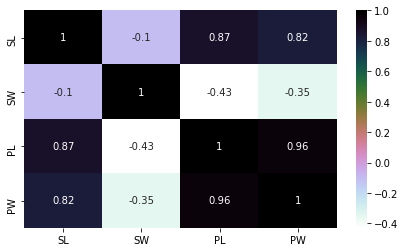

In [8]:
import seaborn as sns
plt.figure(figsize=(7,4)) 
sns.heatmap(df.corr(),annot=True,cmap='cubehelix_r') 
plt.show()

petal width and length are highly correlated
sepal length and awidth are not correlated

In [9]:
df[df['SL'].isnull()].index.tolist()

[2, 21, 39, 51, 85, 106, 141]

In [10]:
df[df['SW'].isnull()].index.tolist()

[10, 27, 43, 72, 98, 124]

In [11]:
df[df['PL'].isnull()].index.tolist()

[28, 42, 56, 94, 109, 147]

In [12]:
df.Classification.nunique()


3

# FILLING THE NULL VALUES USING THE MEAN

In [13]:
df['SL']=df['SL'].fillna(5.856)
df['SW']=df['SW'].fillna(3.05)
df['PL']=df['PL'].fillna(3.756)

In [14]:
df.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [15]:
df['Classification'].value_counts

<bound method IndexOpsMixin.value_counts of 0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Classification, Length: 150, dtype: object>

# LABEL ENCODING THE CLASSIFICATION COLUMN

In [16]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
df['Classification']=label_encoder.fit_transform(df['Classification'])
df

,SL,SW,PL,PW,Classification
0,5.100,3.5,1.400,0.2,0
1,4.900,3.0,1.400,0.2,0
2,5.856,3.2,1.300,0.2,0
3,4.600,3.1,1.500,0.2,0
4,5.000,3.6,1.400,0.2,0
...,...,...,...,...,...
145,6.700,3.0,5.200,2.3,2
146,6.300,2.5,5.000,1.9,2
147,6.500,3.0,3.756,2.0,2
148,6.200,3.4,5.400,2.3,2


# SPLITTING THE DATASET

In [18]:

train_x = df[['SL','SW','PL','PW']]
train_y=df['Classification']
test_x= df[['SL','SW','PL','PW']]
test_y =df['Classification']


In [20]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(train_x,train_y,test_size=0.3,random_state=2)

# LOGISTIC REGRESSION

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
model=LogisticRegression()
model.fit(train_x,train_y)
prediction=model.predict(test_x)
print('The accuracy of the logistic regression is',metrics.accuracy_score(prediction,test_y))











The accuracy of the logistic regression is 0.9555555555555556


C:\Users\shine\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# KNN

In [24]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=3)
model.fit(train_x,train_y)
prediction=model.predict(test_x)
print('The accuracy of the KNN  is',metrics.accuracy_score(prediction,test_y))




The accuracy of the KNN  is 0.9777777777777777


# DECISION TREE

In [25]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(train_x,train_y)
prediction=model.predict(test_x)
print('The accuracy of decision tree classifier  is',metrics.accuracy_score(prediction,test_y))




The accuracy of decision tree classifier  is 0.9555555555555556


# RANDOM FOREST

In [27]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(train_x,train_y)
y_pred=rf.predict(test_x)
print('The accouracy of Random forets classifier is',metrics.accuracy_score(y_pred,test_y))

The accouracy of Random forets classifier is 0.9777777777777777
